<a href="https://colab.research.google.com/github/Ranjithkrishnasamy/Urban-electric-aircraft-ML-optimization/blob/main/Prop_ac_Simulated%20annealing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Optimal Pitch Angle: 18.0
Optimal Attack Angle: 38.0
Optimal Tip Length: 7.24
Max Magnitude: 477.933


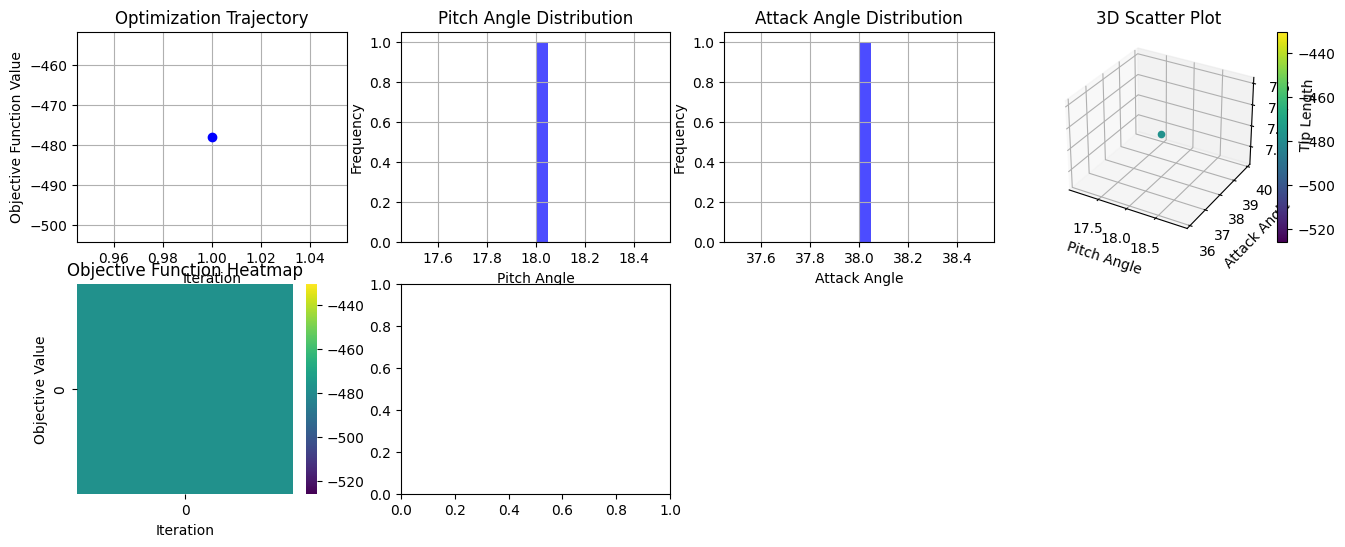

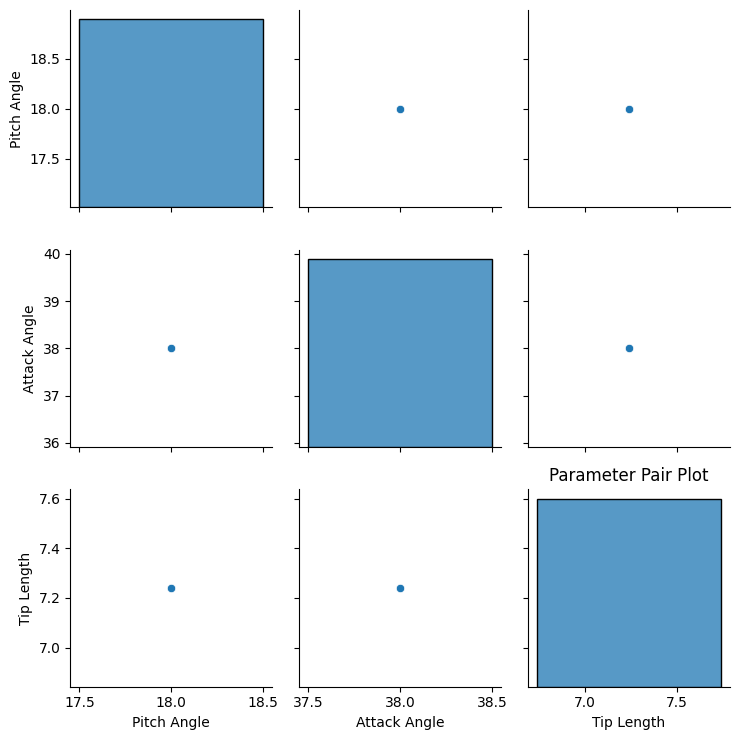

In [ ]:
import numpy as np
from scipy.optimize import minimize
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Load your dataset from a CSV file (replace 'your_dataset.csv' with your file)
filepath = r'/content/Prop set 1 data - Copy.xlsx'
data = pd.read_excel(filepath)

# Define the objective function to maximize Magnitude
def objective(x):
    pitch_angle, attack_angle, tip_length = x
    # Calculate Magnitude based on your dataset (replace this with your calculation)
    filtered_data = data[(data['Pitch angle'] >= pitch_angle) & (data['Attack angle'] <= attack_angle) & (data['Tip length'] >= tip_length)]
    magnitude = -filtered_data['Magnitude'].max()
    return magnitude

# Define constraints
min_pitch_angle = 0.0  # Set your minimum pitch angle constraint
max_tip_length = 10.0  # Set your maximum tip length constraint

constraints = ({'type': 'ineq', 'fun': lambda x: x[0] - min_pitch_angle},
               {'type': 'ineq', 'fun': lambda x: max_tip_length - x[2]})

# Randomly select initial guess from the dataset
initial_guess = data.sample(1).values[0][0:3]  # Assuming the first 3 columns are Pitch, Attack, Tip

# Lists to store optimization history
x_history = []
y_history = []

# Define a custom callback function to record optimization history
def record_history(x):
    x_history.append(x)
    y_history.append(objective(x))

# Run the simulated annealing optimization
result = minimize(objective, initial_guess, constraints=constraints, method='SLSQP', callback=record_history)

# Extract the optimal values
optimal_pitch_angle, optimal_attack_angle, optimal_tip_length = result.x
max_magnitude = -result.fun

# Print the results
print("Optimal Pitch Angle:", optimal_pitch_angle)
print("Optimal Attack Angle:", optimal_attack_angle)
print("Optimal Tip Length:", optimal_tip_length)
print("Max Magnitude:", max_magnitude)

# Visualize the optimization process
plt.figure(figsize=(16, 6))

# Plot 1: Optimization trajectory
plt.subplot(2, 4, 1)
plt.plot(range(1, len(y_history) + 1), y_history, marker='o', linestyle='-', color='b')
plt.xlabel("Iteration")
plt.ylabel("Objective Function Value")
plt.title("Optimization Trajectory")
plt.grid()

# Plot 2: Histogram of Pitch Angle
plt.subplot(2, 4, 2)
plt.hist([x[0] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Pitch Angle")
plt.ylabel("Frequency")
plt.title("Pitch Angle Distribution")
plt.grid()

# Plot 3: Histogram of Attack Angle
plt.subplot(2, 4, 3)
plt.hist([x[1] for x in x_history], bins=20, color='b', alpha=0.7)
plt.xlabel("Attack Angle")
plt.ylabel("Frequency")
plt.title("Attack Angle Distribution")
plt.grid()

# Plot 4: 3D Scatter Plot of the final population
x_history = np.array(x_history)
ax = plt.subplot(2, 4, 4, projection='3d')
sc = ax.scatter(x_history[:, 0], x_history[:, 1], x_history[:, 2], c=y_history, cmap='viridis', marker='o')
plt.xlabel("Pitch Angle")
plt.ylabel("Attack Angle")
ax.set_zlabel("Tip Length")
plt.title("3D Scatter Plot")
plt.grid()
plt.colorbar(sc)

# Plot 5: Heatmap of the objective function values
plt.subplot(2, 4, 5)
sns.heatmap(np.array(y_history).reshape(-1, 1), cmap='viridis', annot=False)
plt.xlabel("Iteration")
plt.ylabel("Objective Value")
plt.title("Objective Function Heatmap")

# Plot 6: Pair plot of parameter combinations
param_df = pd.DataFrame(x_history, columns=['Pitch Angle', 'Attack Angle', 'Tip Length'])
plt.subplot(2, 4, 6)
sns.pairplot(param_df)
plt.title("Parameter Pair Plot")

plt.tight_layout()
plt.show()
